***Import Dependencies***

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

***Data Collection and Preprocessing***

In [3]:
data=pd.read_csv("Mart.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.shape

(8523, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

***Handle Missing Values***
Mean->Average
Mode->More Repeated Values

In [11]:
data['Item_Weight'].mean()

12.857645184135976

In [12]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [13]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [16]:
mode_outlet_size=data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [18]:
print(mode_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [20]:
miss_values=data['Outlet_Size'].isnull()

In [22]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [24]:
data.loc[miss_values,'Outlet_Size']=data.loc[miss_values,'Outlet_Type'].apply(lambda x:mode_outlet_size[x])

In [25]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

***Data Analysis***

In [26]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Figure size 600x600 with 0 Axes>

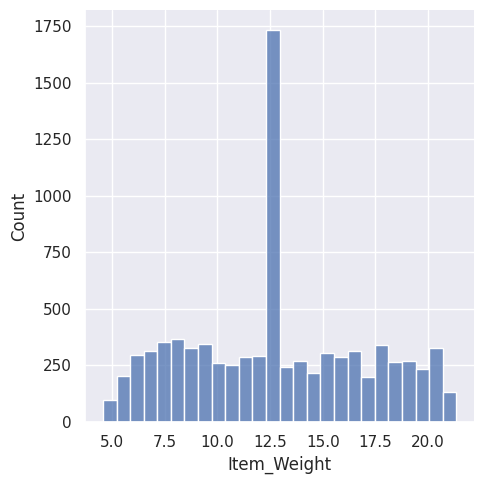

In [32]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(data['Item_Weight'])
plt.show()

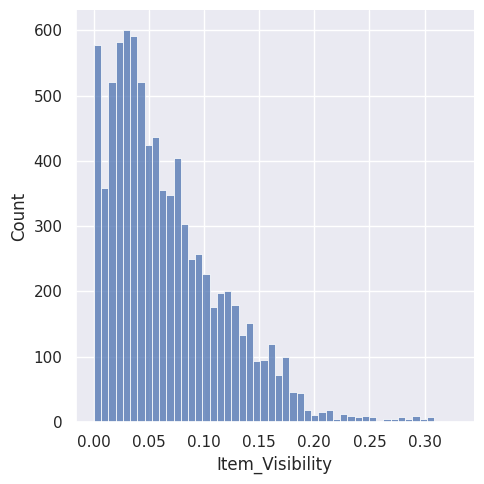

In [33]:
sns.displot(data['Item_Visibility'])
plt.show()

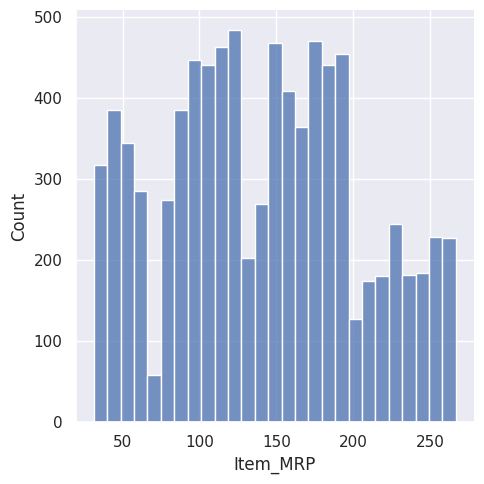

In [34]:
sns.displot(data['Item_MRP'])
plt.show()

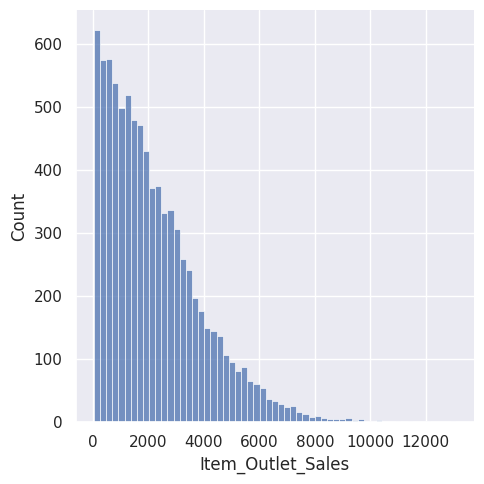

In [35]:
sns.displot(data['Item_Outlet_Sales'])
plt.show()

***Categorical Features***

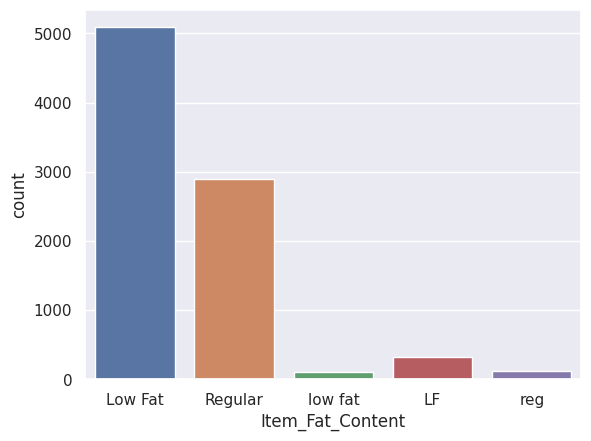

In [36]:
sns.countplot(x='Item_Fat_Content',data=data)
plt.show()

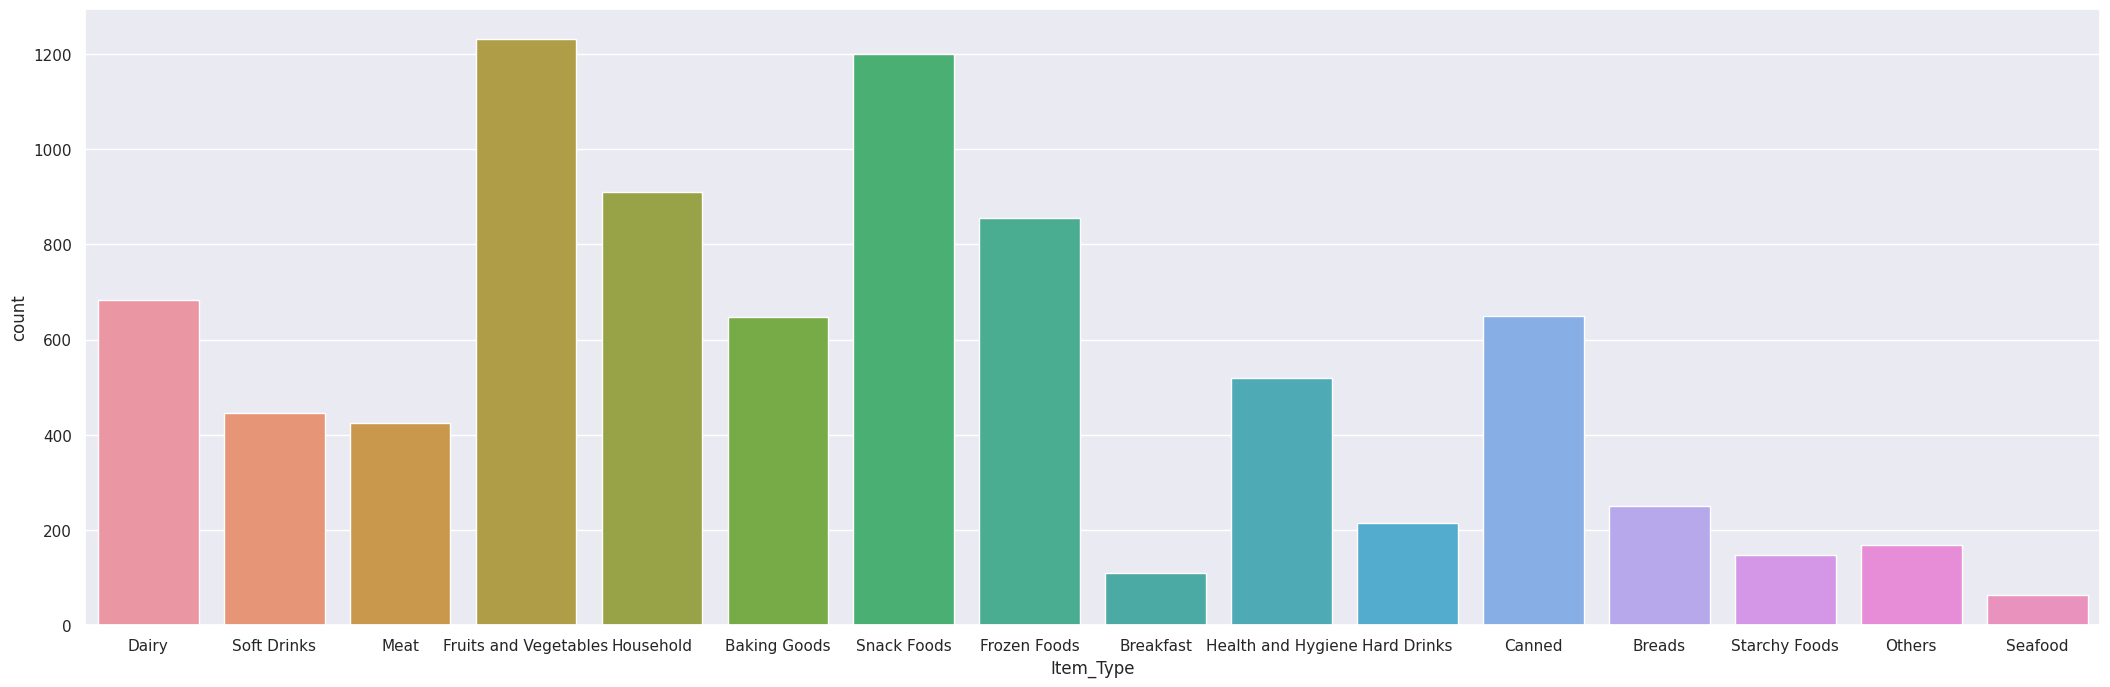

In [40]:
plt.figure(figsize=(26,8))
sns.countplot(x='Item_Type',data=data)
plt.show()

#***Data Preprocessing***

In [41]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [43]:
data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [44]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#***Label Encoding***

In [45]:
encoder=LabelEncoder()
data['Item_Identifier']=encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content']=encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type']=encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier']=encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size']=encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']=encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']=encoder.fit_transform(data['Outlet_Type'])



In [46]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


#***Splitting Features and Target***

In [48]:
features=data.drop(columns='Item_Outlet_Sales',axis=1)
label=data['Item_Outlet_Sales']

In [51]:
features.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [52]:
label.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [54]:
features_train,features_test,label_train,label_test=train_test_split(features,label,test_size=0.2,random_state=2)

In [57]:
print(features.shape,label.shape,features_train.shape,label_train.shape,features_test.shape,label_test.shape)

(8523, 11) (8523,) (6818, 11) (6818,) (1705, 11) (1705,)


#***Machine Learning Model Training***

***XGBoost Regressor***

In [68]:
regressor=XGBRegressor()


In [69]:
regressor.fit(features_train,label_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#***Evaluation***

In [75]:
#training data predictions
train_predict=regressor.predict(features_train)
r2_train=metrics.r2_score(train_predict,label_train)
print('R Squared Value = ',r2_train)

R Squared Value =  0.813599695558012


In [76]:
#Test data predictions
test_predict=regressor.predict(features_test)
r2_test=metrics.r2_score(test_predict,label_test)
print('R Squared Value = ',r2_test)

R Squared Value =  0.21249740750834345


#***Application Phase***

In [78]:
# Collect input from the user for various variables
Item_Identifier = input("\nPlease enter Item Identifier: ").strip()
Item_Weight = float(input("\nPlease enter Item Weight: "))
Item_Fat_Content = input("\nPlease enter Item Fat Content: ").strip()
Item_Visibility = float(input("\nPlease enter Item Visibility: "))
Item_Type = input("\nPlease enter Item Type: ").strip()
Item_MRP = float(input("\nPlease enter Item MRP: "))
Outlet_Identifier = input("\nPlease enter Outlet Identifier: ").strip()
Outlet_Establishment_Year = int(input("\nPlease enter Outlet Establishment Year: "))
Outlet_Size = input("\nPlease enter Outlet Size: ").strip()
Outlet_Location_Type = input("\nPlease enter Outlet Location Type: ").strip()
Outlet_Type = input("\nPlease enter Outlet Type: ").strip()



Please enter Item Identifier: NCDI9

Please enter Item Weight: 8.93

Please enter Item Fat Content: Low Fat

Please enter Item Visibility: 0.000

Please enter Item Type: Household

Please enter Item MRP: 53.86

Please enter Outlet Identifier: OUT013

Please enter Outlet Establishment Year: 1987

Please enter Outlet Size: High

Please enter Outlet Location Type: Tier 3

Please enter Outlet Type: Supermarket Type1


In [81]:

# Create a DataFrame from user input
user_input = pd.DataFrame({
    "Item_Identifier": [Item_Identifier],
    "Item_Weight": [Item_Weight],
    "Item_Fat_Content": [Item_Fat_Content],
    "Item_Visibility": [Item_Visibility],
    "Item_Type": [Item_Type],
    "Item_MRP": [Item_MRP],
    "Outlet_Identifier": [Outlet_Identifier],
    "Outlet_Establishment_Year": [Outlet_Establishment_Year],
    "Outlet_Size": [Outlet_Size],
    "Outlet_Location_Type": [Outlet_Location_Type],
    "Outlet_Type": [Outlet_Type]
})

print("\nUser Input Feature Vector:")
print("==========================\n")
user_input.head()


User Input Feature Vector:



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,NCDI9,8.93,Low Fat,0.0,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1


***Input Label Encoding***

In [82]:
user_input['Item_Identifier']=encoder.fit_transform(user_input['Item_Identifier'])
user_input['Item_Fat_Content']=encoder.fit_transform(user_input['Item_Fat_Content'])
user_input['Item_Type']=encoder.fit_transform(user_input['Item_Type'])
user_input['Outlet_Identifier']=encoder.fit_transform(user_input['Outlet_Identifier'])
user_input['Outlet_Size']=encoder.fit_transform(user_input['Outlet_Size'])
user_input['Outlet_Location_Type']=encoder.fit_transform(user_input['Outlet_Location_Type'])
user_input['Outlet_Type']=encoder.fit_transform(user_input['Outlet_Type'])

In [83]:
user_input.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,8.93,0,0.0,0,53.86,0,1987,0,0,0


In [88]:
Sales=regressor.predict(user_input)
from prettytable import PrettyTable
pretty_table = PrettyTable()
pretty_table.add_column("       <<<<<< Item Outlet Sales >>>>>       ",[Sales])
print(pretty_table)

+----------------------------------------------+
|        <<<<<< Item Outlet Sales >>>>>        |
+----------------------------------------------+
|                  [780.9884]                  |
+----------------------------------------------+


#***Thanks For Reviewing this Document***